In [30]:
import irve
import importlib
importlib.reload(irve)
from irve import *

In [31]:
dfv1 = irve.df.copy()
dfv1["date_mise_en_service"] = dfv1["date_mise_en_service"].dt.round("30D")

/var/folders/qm/bmcy7t85003843mgyfz22jmm0000gn/T/ipykernel_5907/139683537.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/qm/bmcy7t85003843mgyfz22jmm0000gn/T/ipykernel_5907/139683537.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/alex/Documents/projects/_interne/irve/venv/lib/python3.11/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



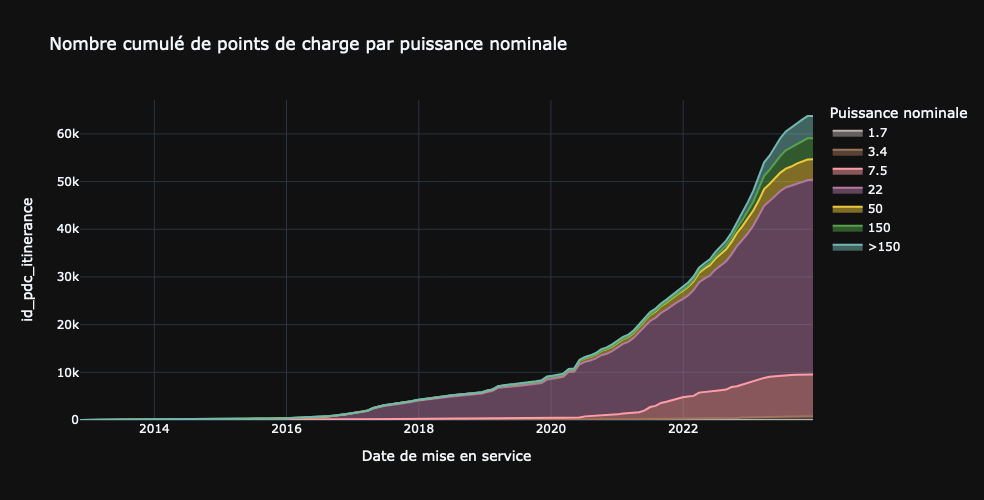

In [39]:
dfv = dfv1.sort_values(by="date_mise_en_service")\
  .groupby(["date_mise_en_service","puissance_nominale_cat"], as_index=False)\
  ["id_pdc_itinerance"]\
  .count()
  
dfv["id_pdc_itinerance"] = dfv.groupby(["puissance_nominale_cat"])\
  ["id_pdc_itinerance"]\
  .cumsum()

px.area(dfv 
        ,x="date_mise_en_service"
        ,y="id_pdc_itinerance"
        ,color="puissance_nominale_cat"
        ,labels=irve.labels
        ,title="Nombre cumulé de points de charge par puissance nominale"
        ,color_discrete_sequence=px.colors.qualitative.T10[::-1]
        ,height=500
       )

In [33]:
irve.df.sample().iloc[0]

prise_type_ef                                                          true
prise_type_2                                                           true
prise_type_combo_ccs                                                  false
prise_type_chademo                                                    false
prise_type_autre  




SyntaxError: invalid syntax (1584858824.py, line 3)

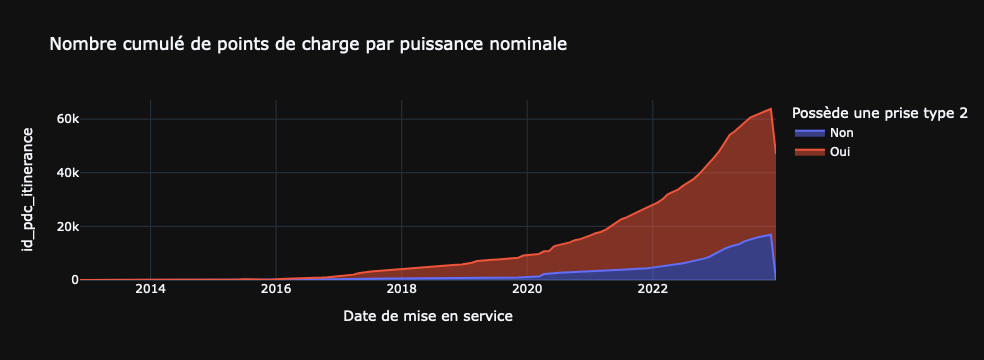

In [35]:
dfv = dfv1.sort_values(by="date_mise_en_service")\
  .groupby(["date_mise_en_service","prise_type_2"], as_index=False)\
  ["id_pdc_itinerance"]\
  .count()
  
dfv["id_pdc_itinerance"] = dfv.groupby(["prise_type_2"])\
  ["id_pdc_itinerance"]\
  .cumsum()

px.area(dfv 
        ,x="date_mise_en_service"
        ,y="id_pdc_itinerance"
        ,color="prise_type_2"
        ,labels=irve.labels
        ,title="Nombre cumulé de points de charge par puissance nominale"
       )

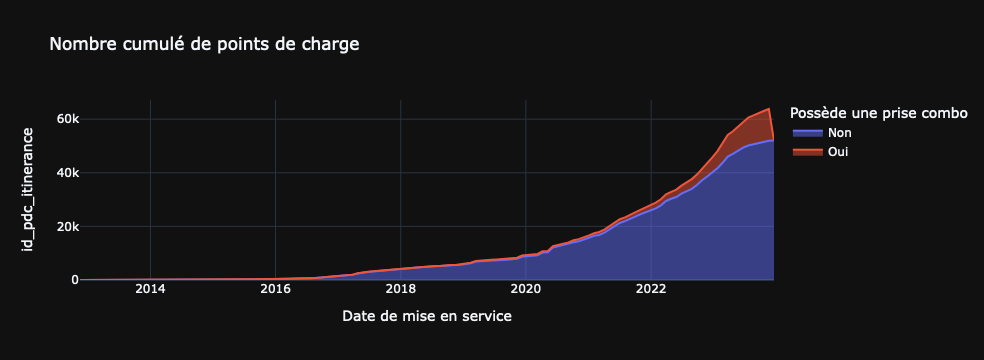

In [36]:
dfv = dfv1.sort_values(by="date_mise_en_service")\
  .groupby(["date_mise_en_service","prise_type_combo_ccs"], as_index=False)\
  ["id_pdc_itinerance"]\
  .count()
  
dfv["id_pdc_itinerance"] = dfv.groupby(["prise_type_combo_ccs"])\
  ["id_pdc_itinerance"]\
  .cumsum()

px.area(dfv 
        ,x="date_mise_en_service"
        ,y="id_pdc_itinerance"
        ,color="prise_type_combo_ccs"
        ,labels=irve.labels
        ,title="Nombre cumulé de points de charge"
       )